<a href="https://colab.research.google.com/github/Karla-Flores/Project-04/blob/main/Model/Chicago_Crime_crimetype_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preprocessing**

In [6]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving chicago_crime_db.csv to chicago_crime_db.csv


In [7]:
# Uploading ETL file
data = pd.read_csv('chicago_crime_db.csv')
data.head(10)

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description,HOUR,SEASON
0,BATTERY,False,True,41.815117,-87.670000,RESIDENCE,Afternoon,Autumn
1,THEFT,False,False,41.895080,-87.765400,CTA,Morning,Autumn
2,NARCOTICS,True,False,41.937406,-87.716650,PUBLIC OPEN SPACE,Afternoon,Autumn
3,ASSAULT,False,True,41.881903,-87.755121,RESIDENCE,Afternoon,Autumn
4,BURGLARY,False,False,41.744379,-87.658431,RESIDENCE,Morning,Autumn
5,BURGLARY,False,False,41.914636,-87.681631,RESIDENCE,Evening,Autumn
6,THEFT,True,False,41.851989,-87.689219,COMMERCIAL BUILDING,Afternoon,Autumn
7,ROBBERY,False,True,41.882814,-87.704326,PUBLIC OPEN SPACE,Morning,Autumn
8,THEFT,False,False,41.763648,-87.722345,PUBLIC OPEN SPACE,Afternoon,Autumn
9,BATTERY,False,False,41.975968,-87.768014,COMMERCIAL BUILDING,Morning,Autumn


In [8]:
data.shape

(6691918, 8)

In [9]:
data.loc[data['Primary Type'] == 'CRIMINAL DAMAGE', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'CRIMINAL TRESPASS', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'DECEPTIVE PRACTICE', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'LIQUOR LAW VIOLATION', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'PUBLIC PEACE VIOLATION', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'WEAPONS VIOLATION', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'
data.loc[data['Primary Type'] == 'GAMBLING', 'Primary Type'] = 'CRIMINAL LAW VIOLATION'

In [10]:
data.loc[data['Primary Type'] == 'OTHER OFFENSE', 'Primary Type'] = 'OTHER'

In [11]:
data.loc[data['Primary Type'] == 'BATTERY', 'Primary Type'] = 'ASSAULT'

In [12]:
data.loc[data['Primary Type'] == 'STALKING', 'Primary Type'] = 'INTIMIDATION'

In [13]:
data.loc[data['Primary Type'] == 'BURGLARY', 'Primary Type'] = 'ROBBERY'
data.loc[data['Primary Type'] == 'MOTOR VEHICLE THEFT', 'Primary Type'] = 'ROBBERY'
data.loc[data['Primary Type'] == 'THEFT', 'Primary Type'] = 'ROBBERY'

In [14]:
data.loc[data['Primary Type'] == 'CRIM SEXUAL ASSAULT', 'Primary Type'] = 'SEX OFFENSE'
data.loc[data['Primary Type'] == 'CRIMINAL SEXUAL ASSAUL', 'Primary Type'] = 'SEX OFFENSE'
data.loc[data['Primary Type'] == 'PROSTITUTION', 'Primary Type'] = 'SEX OFFENSE'

In [15]:
sample = data.sample(frac=0.05)

In [16]:
sample.shape

(334596, 8)

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
sample_dummies = pd.get_dummies(sample, columns = ['Location Description', 'HOUR', 'SEASON'],dtype=float)
sample_dummies.head()

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,Location Description_FEDERAL PROPERTY,Location Description_HOSPITAL,Location Description_HOTEL,Location Description_OTHER,Location Description_PUBLIC ENTERTAINMENT,Location Description_PUBLIC OPEN SPACE,Location Description_RESIDENCE,Location Description_VEHICLE,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
1260212,ASSAULT,False,True,41.773427,-87.621507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5048895,CRIMINAL LAW VIOLATION,True,False,41.704335,-87.631113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2609753,NARCOTICS,True,False,41.916074,-87.713497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415579,CRIMINAL LAW VIOLATION,False,False,41.922583,-87.638650,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2642932,CRIMINAL LAW VIOLATION,False,False,41.880587,-87.706110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
# Split our preprocessed data into our features and target arrays
y = sample_dummies['Primary Type']
X = sample_dummies.drop('Primary Type', axis=1)

In [19]:
len(y.unique())

12

In [20]:
X

,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,Location Description_FEDERAL PROPERTY,Location Description_HOSPITAL,Location Description_HOTEL,Location Description_OTHER,Location Description_PUBLIC ENTERTAINMENT,Location Description_PUBLIC OPEN SPACE,Location Description_RESIDENCE,Location Description_VEHICLE,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
1260212,False,True,41.773427,-87.621507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5048895,True,False,41.704335,-87.631113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2609753,True,False,41.916074,-87.713497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415579,False,False,41.922583,-87.638650,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2642932,False,False,41.880587,-87.706110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186239,True,False,42.007859,-87.668737,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5000143,True,False,41.878799,-87.731549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4561431,False,False,41.882348,-87.756806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
825320,True,True,41.953255,-87.760907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
len(y.unique())

12

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
y_label = le.transform(y)
y_label

array([ 1,  2,  7, ..., 10,  9,  2])

In [23]:
len(y_label)

334596

In [24]:
y_label.shape

(334596,)

In [25]:
from tensorflow.keras.utils import to_categorical


In [26]:
Y = to_categorical(y_label, 12)
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [27]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state= 42)

In [28]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled.shape

(250947, 25)

In [30]:
y_train.shape

(250947, 12)

# Neural Network


In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# # First hidden layer
nn.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=25))

# # Second hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="relu"))

# # Third hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# # Output layer
nn.add(tf.keras.layers.Dense(units=12, activation="softmax"))

# # Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2600      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                372       
Total params: 9,552
Trainable params: 9,552
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Recall()])

In [34]:
y_train.shape

(250947, 12)

In [35]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, validation_split=0.15, epochs=100)

Epoch 1/100
6666/6666 [==============================] - 19s 3ms/step - loss: 1.2474 - accuracy: 0.5297 - recall: 0.3522 - val_loss: 1.2310 - val_accuracy: 0.5326 - val_recall: 0.4004
Epoch 2/100
6666/6666 [==============================] - 16s 2ms/step - loss: 1.2267 - accuracy: 0.5329 - recall: 0.3617 - val_loss: 1.2254 - val_accuracy: 0.5348 - val_recall: 0.3742
Epoch 3/100
6666/6666 [==============================] - 16s 2ms/step - loss: 1.2215 - accuracy: 0.5341 - recall: 0.3634 - val_loss: 1.2218 - val_accuracy: 0.5349 - val_recall: 0.4000
Epoch 4/100
6666/6666 [==============================] - 16s 2ms/step - loss: 1.2174 - accuracy: 0.5347 - recall: 0.3634 - val_loss: 1.2183 - val_accuracy: 0.5344 - val_recall: 0.3796
Epoch 5/100
6666/6666 [==============================] - 16s 2ms/step - loss: 1.2145 - accuracy: 0.5352 - recall: 0.3651 - val_loss: 1.2189 - val_accuracy: 0.5346 - val_recall: 0.3987
Epoch 6/100
6666/6666 [==============================] - 17s 3ms/step - loss: 1.

In [37]:
# Evaluate the model using the training data 
model_loss, model_accuracy, model_Recall = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2615/2615 - 3s - loss: 1.2297 - accuracy: 0.5317 - recall: 0.3598
Loss: 1.2297433614730835, Accuracy: 0.5316501259803772


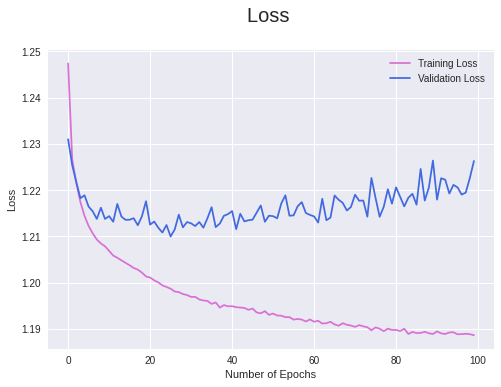

In [38]:
# Model Loss Graph
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'orchid', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()